# GameStore Analysis
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. 

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplot
import matplotlib.pyplot as plt
from datetime import datetime
import re
# hypothesis testing
from scipy import stats as st
import random
import seaborn as sns

## Open the data file and study the general information

### Open Datasets

In [2]:
try: 
    df = pd.read_csv('games.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


### General Informations

In [3]:
# check the first 5 rows of dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# check the last 5 rows of dataframe
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# check the statistics of dataframe
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# check the number of columns and rows of dataframe
df.shape

(16715, 11)

There are 16715 rows and 11 columns

In [8]:
# check for the missing values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

There are 2 missing values in `Name`, 269 missing in `Year_of_Release`, and large portions of missing values in `Critic_Score`, `User_Score`, and `Rating`. 

In [9]:
# check for duplicates
df.duplicated().sum()

0

There is no duplicated data. 

**Conclusion**

We noticed there are missing values in many columns, some data types need conversion, and we columns names need to convert to all lower cases. 

## Data Preparation

### Convert column names

In [10]:
# convert column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Processing missing values

In [11]:
# caculate the percentage of missing value 
df.isnull().sum() * 100 / len(df)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

There are almost half of the values are missing in `Critic_Score`, `User_Score`, and `Rating`. 

Because the percentage of missing in `name` and `genre` is very small, we can drop them.

In [12]:
df = df.dropna(subset=['name', 'genre']).reset_index(drop = True)

For `year_of_release`, `critic_score`, `user_score`, and `user_score`, we are going to filling missing data by random choosing from non missing values. 

In [13]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

We notice the minimum value for `critic_score` is 13 and maximum value is 98, we can create a list with values between 13 and 98. 

In [14]:
fill_list = list(range(13, 98))
df['critic_score'] = df['critic_score'].fillna(pd.Series(np.random.choice(fill_list, size = len(df.index))))

The maximum value for `user_score` is 10, so we create a list with values betwen 0 and 10. For the abbreviation `tbd` we treat it as a missing value.

In [15]:
fill_list2 = list(range(0, 10))
df['user_score'] = df['user_score'].replace('tbd',np.nan)
df['user_score'] = df['user_score'].fillna(pd.Series(np.random.choice(fill_list2, size = len(df.index))))

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We know `rating` has a list of different ratings. We can create a list with existing rating values.

In [17]:
fill_list3 = ['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
df['rating'] = df['rating'].fillna(pd.Series(np.random.choice(fill_list3, size = len(df.index))))

In [18]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

We know `year_of_release` has minimum year 1980 and maximum year 2016. We can create a list with year between 1980 and 2016. 

In [19]:
fill_list4 = list(range(1980, 2016))
df['year_of_release'] = df['year_of_release'].fillna(pd.Series(np.random.choice(fill_list4, size = len(df.index))))

In [20]:
# now we don't have missing values
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Conclusion**

We dropped missing values from `name` and `genre`, we replaced missing values from `year_of_release`, `critic_score`, `rating` and `user_score` by randomly choosing from non missing values. For value `tbd`, which is to be determined, we treat is as a missing value. This is because these columns all contain categorical values, so we can use this way to handle missing values. 

### Converting data types

In [21]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [22]:
# using dictionary to convert specific columns data types
convert_dict = {'name': str,
                'platform': str,
                'year_of_release': 'int64',
                'genre': str,
                'critic_score': 'int64',
                'user_score': float,
                'rating': str
               }
df = df.astype(convert_dict)
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

### Calculate total sales

In [23]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,67,4.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,43,5.0,E,31.38


### Conclusion
We converted column names to all lower cases, and we dropped missing values in `name` and `genre`. We replace missing values with existing values in columns `year_of_release`, `critic_score`, `rating` and `user_score`. Specifically, we treat value `tbd` in `user_score` as a missing value. Lastly, we convert data types to the correct ones, and calculate the total sales for each game and put these values in a separate column `total_sales`.

## Analyze the data

### Number of  games were released in different years

In [25]:
df_game = df[['year_of_release', 'name']].groupby('year_of_release').agg('count').sort_values('year_of_release').reset_index()
df_game

,year_of_release,name
0,1980,15
1,1981,51
2,1982,45
3,1983,25
4,1984,19
5,1985,19
6,1986,26
7,1987,27
8,1988,20
9,1989,23


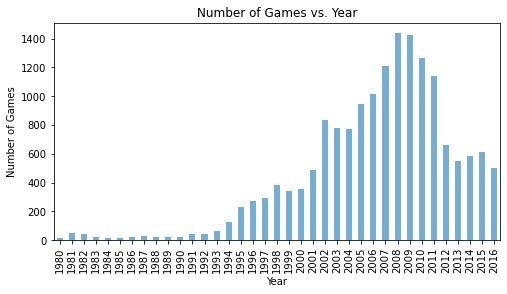

In [26]:
# create bar plot for number of games released each year.
df_game.plot.bar(x = 'year_of_release', y = 'name', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title("Number of Games vs. Year");

We noticed after year 1994, the number of games released each year starts increasing. The peak number is in year 2009. Starting from 2009, the number of games released each year starts decreasing. This is because the use of smart phones, people started to play games on their smart phones and tablets. 

In [27]:
# sum 5 years into a period
df_game_period = df_game.groupby(df_game['year_of_release'] // 5).sum()

In [28]:
period = ['1980 - 1984', '1984 - 1989','1990 - 1994', '1995 - 2009', 
          '2000 - 2004', '2005 - 2009', '2010 - 2014', '2015 - 2016']
df_game_period['Period'] = period

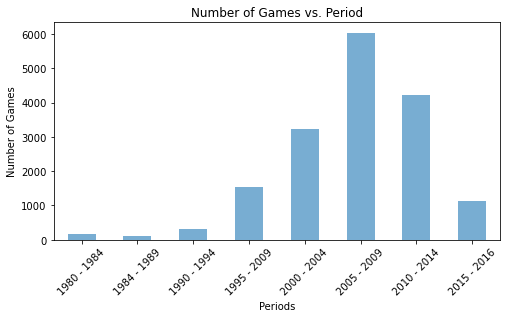

In [29]:
df_game_period.plot.bar(x = 'Period', y = 'name', rot = 45, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Periods')
plt.ylabel('Number of Games')
plt.title("Number of Games vs. Period");

We can see between 2005 and 2009 has the most number of games released. We observed from the bar plot that the data for the period 2000 to 2016 was significant with year between 2005 and 2009 having the most significance in the data. 

### How sales varied from platform to platform.

In [30]:
df_sales = df[['platform', 'total_sales']].groupby('platform').agg('count').sort_values('total_sales', ascending = False).reset_index()
df_sales.nlargest(5, 'total_sales')

,platform,total_sales
0,PS2,2161
1,DS,2151
2,PS3,1331
3,Wii,1320
4,X360,1262


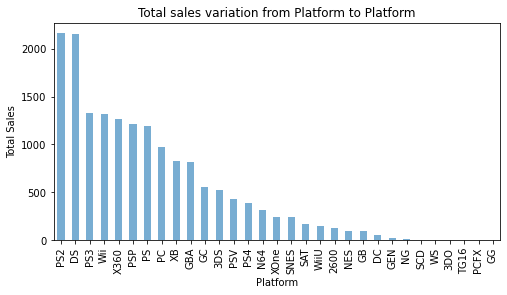

In [31]:
df_sales.plot.bar(x = 'platform', y = 'total_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title("Total sales variation from Platform to Platform");

We can see the top 5 platforms are `PS2`, `DS`, `PS3`, `Wii`, and `X360`. The platforms with least sales are `GG`, `PCFX`, `TG16`, `3DO`, and `W5`. We can choose the top 5 platforms with the greatest total sales and build distribution based on data for each year.

#### Choose the platforms with the greatest total sales and build a distribution based on data for each year

In [32]:
df_top = df[df.platform.isin(['PS2', 'DS', 'PS3', 'Wii', 'X360'])]
top5_sales = df_top.pivot_table(index = 'year_of_release', values= 'total_sales', columns = 'platform', aggfunc = np.sum)
top5_sales.tail()

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2012,11.13,NaN,107.57,21.71,99.99
2013,1.54,3.35,113.35,8.59,88.93
2014,NaN,NaN,47.95,4.30,35.17
2015,NaN,1.92,16.83,1.14,11.96
2016,NaN,NaN,3.60,0.18,1.52


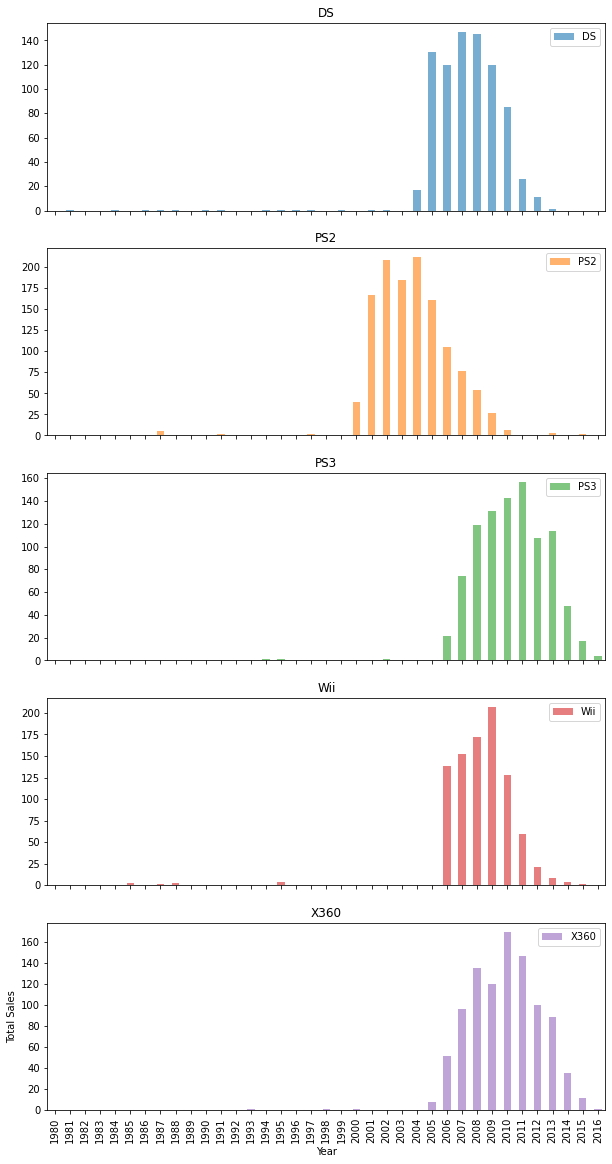

In [33]:
top5_sales.plot.bar(subplots=True, figsize=(10, 20), alpha = 0.6)
plt.suptitle("")
plt.xlabel('Year')
plt.ylabel('Total Sales');

We can see that 
* `PS2` which has top 1 sales was popular between 2001 and 2007, and started dropping after 2007. PS2 used to be very popular but have zero sales right now. 
* `DS` was very popular between 2005 and 2010. DS used to be very popular but have zero sales right now. 
* `PS3` was very popular between 2008 and 2013, the sales started dropping after 2013. 
* `Wii` was popular between 2006 and 2011. It's sales has reduced since 2011 now have zero sales.
* `X360` was popular between 2006 and 2011.
* It generally takes around 6 to 7 years for new platforms to appear and old ones to fade. 

#### Find platforms that used to be popular but now have zero sales.

We can find platform that were popular but now have zero sales based on the z-score. If the z-score of certain platform is greater than 0, means that platform used to be popular but now have zero sales. If the z-score of certain platform is less than 0, means that platform wasn't very popular at all time. 

In [34]:
df_platform = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df_platform.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


In [35]:
# calculate the z-scores
df_platform['sales_zscore'] = (df_platform['total_sales'] - df_platform['total_sales'].mean())/ df_platform['total_sales'].std()
df_platform['colors'] = ['orange' if x < 0 else 'blue' for x in df_platform['sales_zscore']]
df_platform.head()

,platform,total_sales,sales_zscore,colors
0,PCFX,0.03,-0.825614,orange
1,GG,0.04,-0.825586,orange
2,3DO,0.10,-0.825413,orange
3,TG16,0.16,-0.825241,orange
4,WS,1.42,-0.821623,orange


Diverging bar plot: https://www.geeksforgeeks.org/diverging-bar-chart-using-python/

In [36]:
pd.set_option('display.max_columns', None)
temp = df.pivot_table(index = 'year_of_release', values= 'total_sales', columns = 'platform', aggfunc = np.sum)
temp.tail()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,0.47,NaN,51.76,NaN,11.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.22,NaN,NaN,NaN,107.57,NaN,7.73,16.19,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.99,0.58,NaN
2013,0.46,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.43,NaN,0.18,3.35,113.35,25.99,3.14,10.59,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.93,0.63,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,0.67,0.29,NaN,NaN,NaN,NaN,NaN,13.28,NaN,NaN,NaN,47.95,100.00,0.24,11.90,NaN,NaN,NaN,NaN,NaN,4.30,22.03,35.17,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,0.37,0.29,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,1.92,16.83,118.90,0.12,6.25,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,0.12,60.14
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN,3.60,69.25,NaN,4.25,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


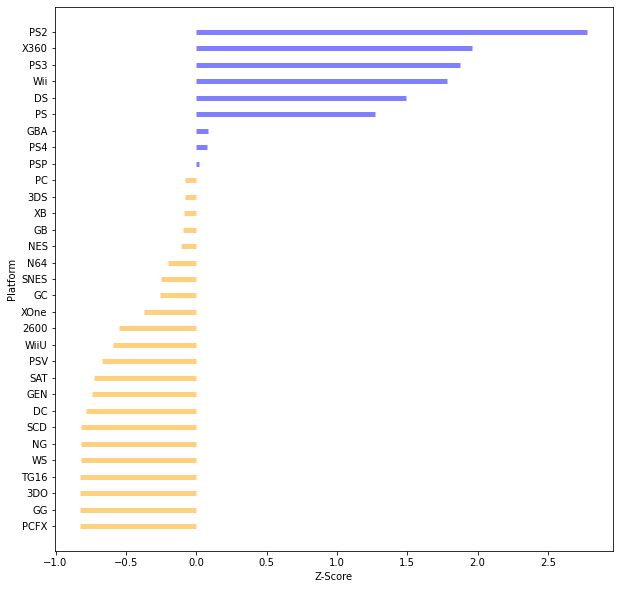

In [37]:
# draw a diverging bar plot
plt.figure(figsize=(10, 10))
plt.hlines(y = df_platform.platform, xmin = 0, xmax = df_platform.sales_zscore, color = df_platform.colors, alpha=0.5, linewidth=5)
plt.gca().set(ylabel='Platform', xlabel='Z-Score');

From the diverging bar plot, we can see platforms with z-scores > 0 are those used to be popular. These platforms are `PS2`, `X360`, `PS3`, `Wii`, `DS`, and `PS`. In these popular platforms, `PS2`, `DS`, and `PS` have zero sales in year 2016. Platforms with z-scores way less than 0 are those weren't popular at all time. These platforms are `PCFX`, `GG`, `3DO`, `TG16`, and `WS`. 

As we did in the previous steps, we can choose data after year `2012` to be relevant to our analysis. 

In [38]:
df_new = df[df['year_of_release'] > 2012]
df_new = df_new.reset_index(drop = True, inplace = False)

### Which platforms are leading in sales? Which ones are growing or shrinking?

In [39]:
# platforms that are leading in sales. 
df_sales = df_new[['platform', 'total_sales']].groupby('platform').sum().sort_values(by = 'total_sales', ascending = False).reset_index()
df_sales.head(10)

,platform,total_sales
0,PS4,314.14
1,PS3,181.73
2,XOne,159.32
3,3DS,143.25
4,X360,137.58
5,WiiU,64.63
6,PC,39.48
7,PSV,32.99
8,Wii,14.21
9,PS2,5.27


We can see that `PS4`, `PS3`, `XOne`, `3DS`, and `X360` are platforms that are leading in sales. 

In [40]:
# platforms that are shrinking in sales. 
df_sales_year = df_new.pivot_table(index = 'year_of_release', values= 'total_sales', columns = 'platform', aggfunc = np.sum)
df_sales_year.head()

platform,2600,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,
2013,0.46,56.57,1.54,NaN,NaN,12.43,0.18,3.35,113.35,25.99,3.14,10.59,8.59,21.65,88.93,0.63,18.96
2014,NaN,43.76,NaN,0.67,0.29,13.28,NaN,NaN,47.95,100.00,0.24,11.90,4.30,22.03,35.17,NaN,54.07
2015,NaN,27.78,NaN,0.37,0.29,8.52,NaN,1.92,16.83,118.90,0.12,6.25,1.14,16.35,11.96,0.12,60.14
2016,NaN,15.14,NaN,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,NaN,26.15


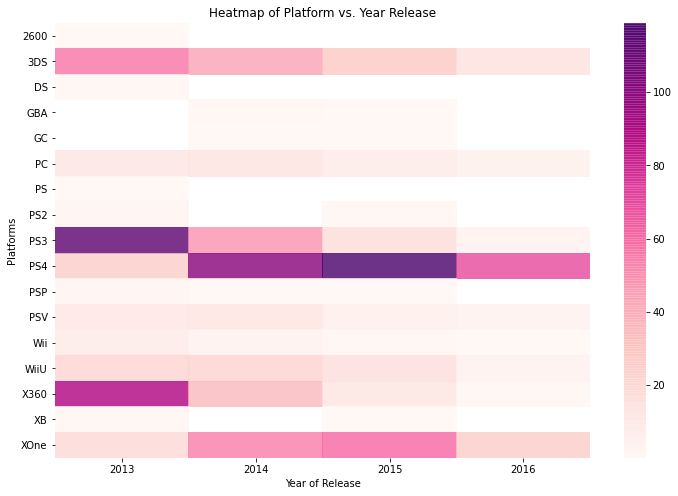

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df_sales_year.T, cmap = 'RdPu', alpha = 0.8)
plt.title('Heatmap of Platform vs. Year Release')
plt.xlabel('Year of Release')
plt.ylabel('Platforms');

From the above heatmap, we can see that `PS4`, `PS3`, `XOne`, `3DS`, and `X360` are platforms that are leading in sales, which we already confirmed. Platforms with light colors such as `3DS`, `2600`, and `GBA` are platforms are shrinking in sales. Platforms that are potentially profitable are those used to popular and still have sales in recent years. These platforms are `PS4` and `XOne`.  

### Build a box plot for the global sales of all games, broken down by platform.  Calculate average sales on various platforms

In [42]:
group_platform = df_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
group_platform.head()

,platform,year_of_release,total_sales
0,2600,2013,0.46
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = group_platform, x = 'platform', y = 'total_sales')
plt.title('Boxplot for the global sales of all games')
plt.xlabel('Platforms')
plt.ylabel('Total Sales');

We can observe from the above boxplot that the differences in sales are also significant. `PS4` has the highest mean value. We can also see the average sales on various platforms by calculating the average sales for each platform.

In [ ]:
avg_sales = df_new.pivot_table(index = 'platform', values= 'total_sales', columns = 'year_of_release', aggfunc = np.mean).reset_index().rename_axis(None, axis=1)
avg_sales['average_sales'] = avg_sales.mean(axis=1)
avg_sales = avg_sales.sort_values(by = 'average_sales')
avg_sales.head()

In [ ]:
avg_sales.plot.bar(x = 'platform', y = 'average_sales', alpha = 0.6, legend = False, figsize = (10, 5))
plt.title('Barplot for the average sales of all games')
plt.xlabel('Platforms')
plt.ylabel('Average Sales');

From the above barplot, we can see that `PS4` has the highest average sales across the various platforms, followed by `PS`, `XOne`, and `PS2`.

### How user and professional reviews affect sales for one popular platform 

In [46]:
# I choose PS4
df_PS4 = df_new[df_new['platform'] == 'PS4'].reset_index(drop = True)
df_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,90,3.0,EC,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,27,6.0,RP,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


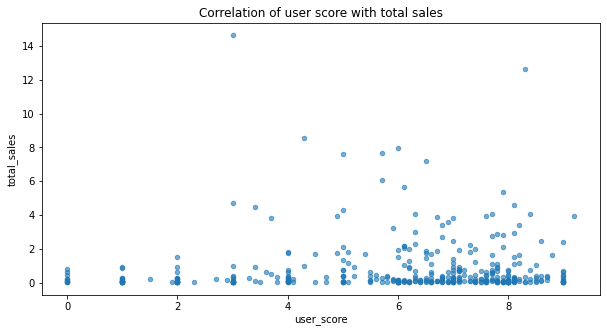

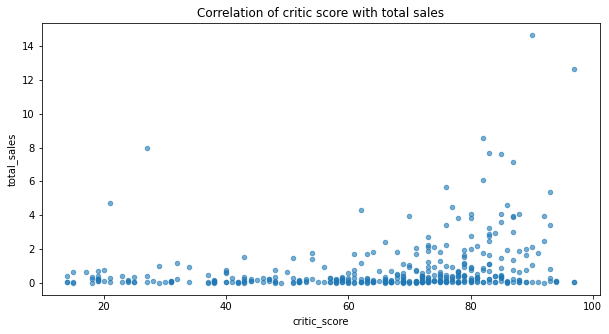

In [47]:
# Build a scatter plot of how user and professional reviews affect sales on Wii
df_PS4.plot.scatter(x = 'user_score', y = 'total_sales', title = "Correlation of user score with total sales", alpha = 0.6, figsize = (10,5));
df_PS4.plot.scatter(x = 'critic_score', y = 'total_sales', title = "Correlation of critic score with total sales", alpha = 0.6, figsize = (10,5));

In [48]:
print('The correlation between user score and total sales is', df_PS4['user_score'].corr(df_PS4['total_sales']).round(2))
print('The correlation between critic score and total sales is', df_PS4['critic_score'].corr(df_PS4['total_sales']).round(2))

The correlation between user score and total sales is 0.05
The correlation between critic score and total sales is 0.25


The correlation between professional ratings and total sales are very small, we can conclude that there are no relation between them. 

#### Compare the sales of the same games on other platforms.

**PS3**

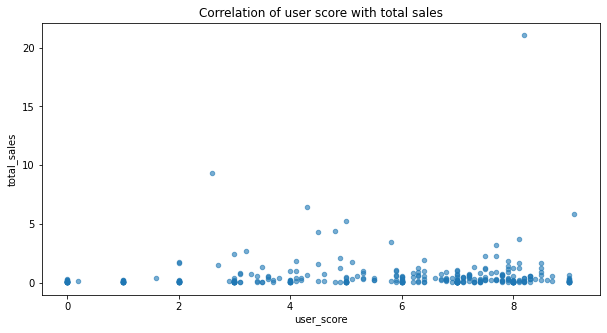

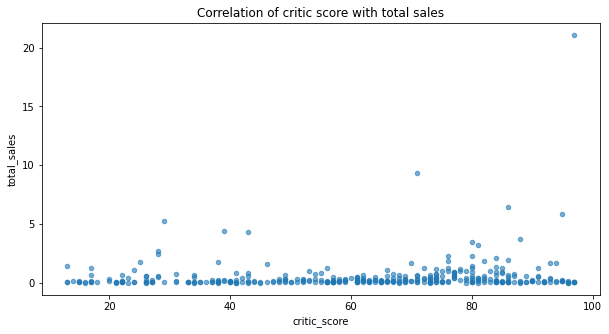

In [49]:
df_PS3 = df_new[df_new['platform'] == 'PS3'].reset_index(drop = True)
df_PS3.plot.scatter(x = 'user_score', y = 'total_sales', title = "Correlation of user score with total sales", alpha = 0.6, figsize = (10,5));
df_PS3.plot.scatter(x = 'critic_score', y = 'total_sales', title = "Correlation of critic score with total sales", alpha = 0.6, figsize = (10,5));

In [50]:
print('The correlation between user score and total sales is', df_PS3['user_score'].corr(df_PS3['total_sales']).round(2))
print('The correlation between critic score and total sales is', df_PS3['critic_score'].corr(df_PS3['total_sales']).round(2))


The correlation between user score and total sales is 0.07
The correlation between critic score and total sales is 0.13


No significant relation between professional scores and total sales for `PS3`.

**3DS**

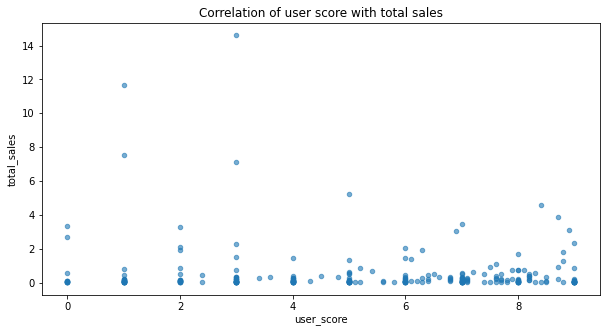

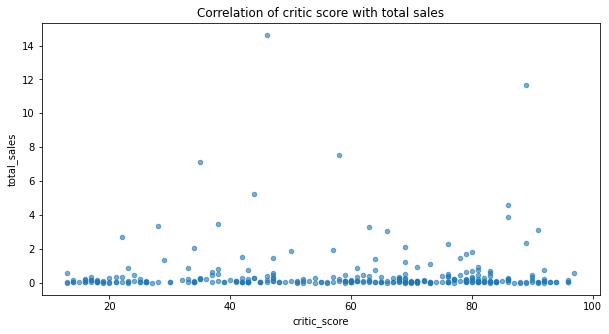

In [51]:
df_3DS = df_new[df_new['platform'] == '3DS'].reset_index(drop = True)
df_3DS.plot.scatter(x = 'user_score', y = 'total_sales', title = "Correlation of user score with total sales", alpha = 0.6, figsize = (10,5));
df_3DS.plot.scatter(x = 'critic_score', y = 'total_sales', title = "Correlation of critic score with total sales", alpha = 0.6, figsize = (10,5));

In [52]:
print('The correlation between user score and total sales is', df_3DS['user_score'].corr(df_3DS['total_sales']).round(2))
print('The correlation between critic score and total sales is', df_3DS['critic_score'].corr(df_3DS['total_sales']).round(2))


The correlation between user score and total sales is -0.08
The correlation between critic score and total sales is 0.02


No significant relation between professional scores and total sales for `3DS`.

**X360**

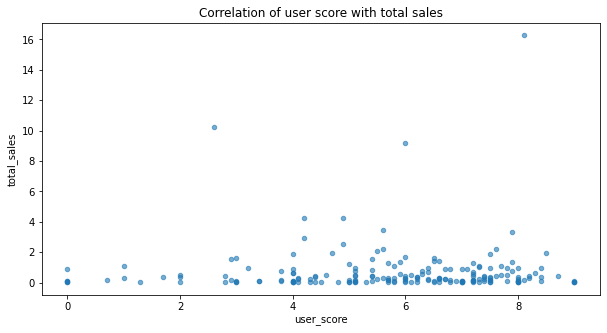

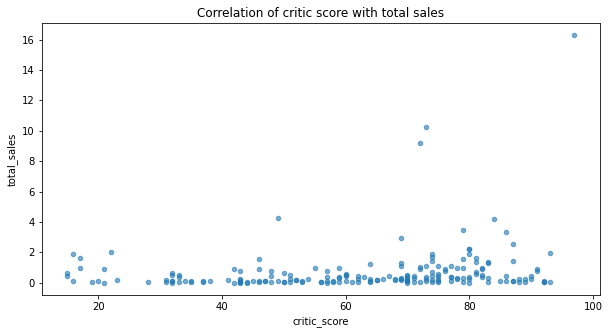

In [53]:
df_X360 = df_new[df_new['platform'] == 'X360'].reset_index(drop = True)
df_X360.plot.scatter(x = 'user_score', y = 'total_sales', title = "Correlation of user score with total sales", alpha = 0.6, figsize = (10,5));
df_X360.plot.scatter(x = 'critic_score', y = 'total_sales', title = "Correlation of critic score with total sales", alpha = 0.6, figsize = (10,5));

In [54]:
print('The correlation between user score and total sales is', df_X360['user_score'].corr(df_X360['total_sales']).round(2))
print('The correlation between critic score and total sales is', df_X360['critic_score'].corr(df_X360['total_sales']).round(2))

The correlation between user score and total sales is 0.01
The correlation between critic score and total sales is 0.2


No significant relation between professional scores and total sales for `X360`.

**XOne**

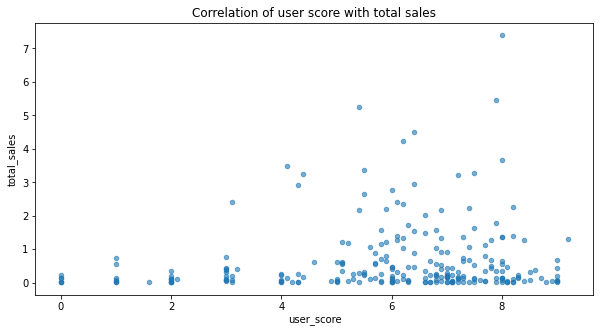

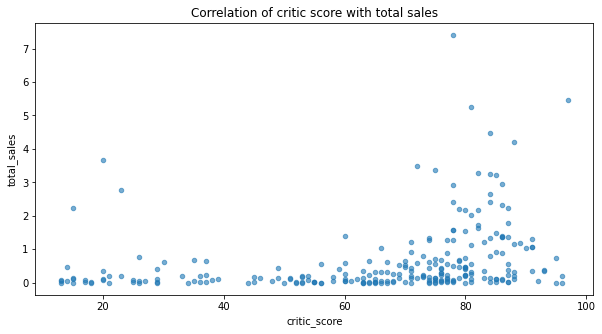

In [55]:
df_XOne = df_new[df_new['platform'] == 'XOne'].reset_index(drop = True)
df_XOne.plot.scatter(x = 'user_score', y = 'total_sales', title = "Correlation of user score with total sales", alpha = 0.6, figsize = (10,5));
df_XOne.plot.scatter(x = 'critic_score', y = 'total_sales', title = "Correlation of critic score with total sales", alpha = 0.6, figsize = (10,5));

In [56]:
print('The correlation between user score and total sales is', df_XOne['user_score'].corr(df_XOne['total_sales']).round(2))
print('The correlation between critic score and total sales is', df_XOne['critic_score'].corr(df_XOne['total_sales']).round(2))

The correlation between user score and total sales is 0.12
The correlation between critic score and total sales is 0.27


No significant relation between professional scores and total sales for `XOne`.

**Conclusion** 

We can conclude that the correlation between `critic_sore` and `total_sales` is higher than `user_score` and `total_sales`.  

### Take a look at the general distribution of games by genre

In [57]:
group_genre = df_new.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False)
group_genre.head()

,genre,total_sales
0,Action,325.37
8,Shooter,233.21
10,Sports,151.31
7,Role-Playing,145.90
3,Misc,63.94


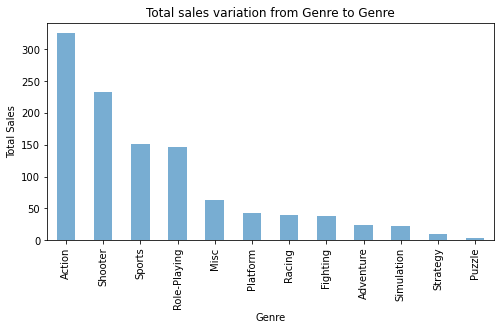

In [58]:
group_genre.plot.bar(x = 'genre', y = 'total_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title("Total sales variation from Genre to Genre");

We can see the top 5 genres are `Action`, `Shooter`, `Sports`, `Role-Playing`, and `Misc`. `Puzzle` has the least sales. 

### Conclusion

We found that year `2009` released the most number of games and most number of games released between `2005` and `2009`. We determined that `PS2`, `DS`, `PS3`, `Wii`, `X360` are the top 5 platforms with the greatest total sales. `PS2`, `DS`, and `PS` have zero sales in year 2016, they used to be popular. `PS4`, `X360`, `PS3`, `Wii`, and `DS` are platforms that are leading in sales. `3DS`, `2600`, and `GBA` are platforms are shrinking in sales. Platforms that are potentially profitable are `PS4` and `XOne`. `PS4` has the highest mean value in terms of total sales. In general, we can conclude that the playstation (`PS`series) have more sales than any other platforms. `PS4` has the highest average sales across the various platforms, followed by `PS`, `XOne`, and `PS2`. We found that professional reviews doesn't correlate with total sales for popular platforms. For `genre`, `Action`, `Shooter`, and `Sports` have the greatest sales, and `Puzzle` has the least sales.

## Create a user profile for each region

### Top 5 Platforms

In [59]:
# top 5 platforms for North America
na_platform = df_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_platform = na_platform.head().reset_index(drop = True)
na_platform

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,82.12
3,PS3,63.75
4,3DS,38.20


In [60]:
# top 5 platforms for Europe
eu_platform = df_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_platform = eu_platform.head().reset_index(drop = True)
eu_platform

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.77
4,3DS,30.96


In [61]:
# top 5 platforms for Japan
jp_platform = df_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_platform = jp_platform.head().reset_index(drop = True)
jp_platform

,platform,jp_sales
0,3DS,67.81
1,PS3,23.38
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


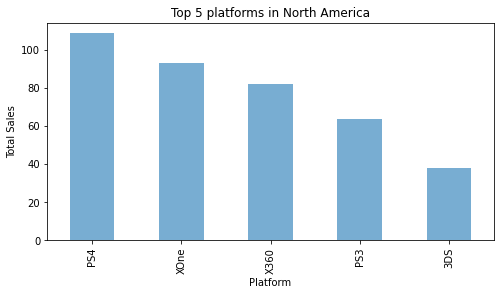

In [62]:
na_platform.plot.bar(x = 'platform', y = 'na_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title("Top 5 platforms in North America");

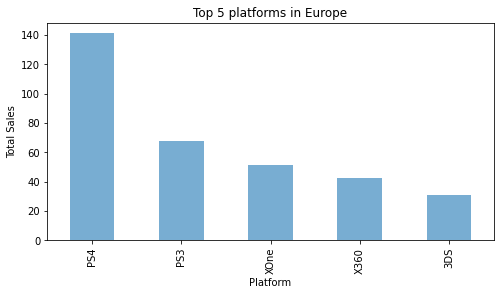

In [63]:
eu_platform.plot.bar(x = 'platform', y = 'eu_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title("Top 5 platforms in Europe");

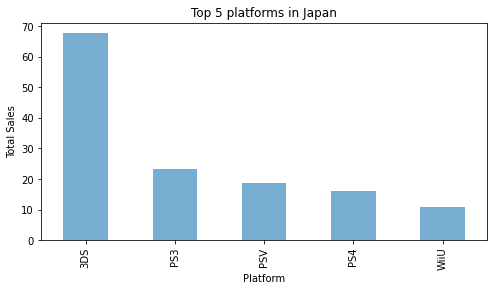

In [64]:
jp_platform.plot.bar(x = 'platform', y = 'jp_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title("Top 5 platforms in Japan");

**Conclusion** 

The top 5 platforms in North America and Europe are pretty similar. However, in Japan, the top 1 platform is `3DS`, followed by `DS`. We can see `3DS` is in rank 5 in North America and Europe.

### Top 5 Genres

In [65]:
# top 5 genres for North America
na_genre = df_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_genre = na_genre.head().reset_index(drop = True)
na_genre

,genre,na_sales
0,Action,128.55
1,Shooter,109.85
2,Sports,65.87
3,Role-Playing,46.40
4,Misc,28.20


In [66]:
# top 5 genres for Europe
eu_genre = df_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_genre = eu_genre.head().reset_index(drop = True)
eu_genre

,genre,eu_sales
0,Action,118.99
1,Shooter,87.95
2,Sports,60.53
3,Role-Playing,36.97
4,Racing,20.41


In [67]:
# top 5 genres for Japan
jp_genre = df_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_genre = jp_genre.head().reset_index(drop = True)
jp_genre

,genre,jp_sales
0,Role-Playing,51.05
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


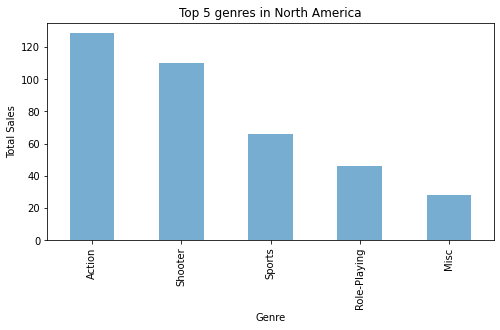

In [68]:
na_genre.plot.bar(x = 'genre', y = 'na_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title("Top 5 genres in North America");

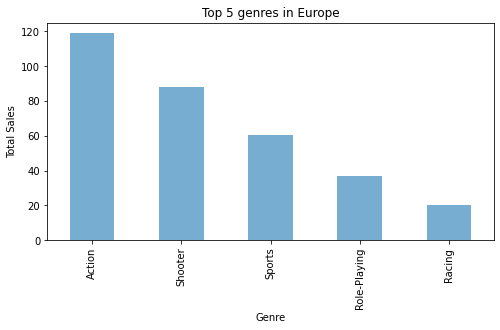

In [69]:
eu_genre.plot.bar(x = 'genre', y = 'eu_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title("Top 5 genres in Europe");

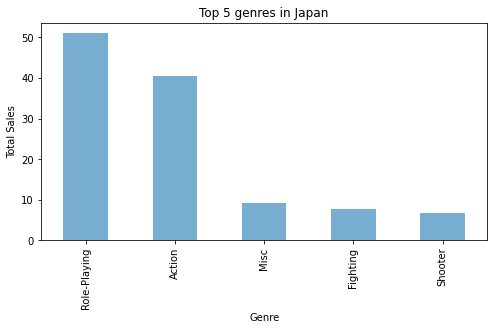

In [70]:
jp_genre.plot.bar(x = 'genre', y = 'jp_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title("Top 5 genres in Japan");

**Conclusion**

We can see the top 5 genres in North America and Europe are the same, in Japan, however, is different. The top 1 genre in Japan is `Role-Playing`, which doesn't appear in the list for both North America and Europe. 

### Do ESRB ratings affect sales in individual regions?

In [71]:
# top 5 ratings in North America
na_rating = df_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_rating = na_rating.head().reset_index(drop = True)
na_rating

,rating,na_sales
0,M,179.62
1,E,87.89
2,E10+,71.04
3,T,55.06
4,EC,15.17


In [72]:
# top 5 ratings in Europe
eu_rating = df_new.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_rating = eu_rating.head().reset_index(drop = True)
eu_rating

,rating,eu_sales
0,M,154.81
1,E,93.33
2,E10+,56.51
3,T,46.09
4,EC,14.22


In [73]:
# top 5 ratings in Japan
jp_rating = df_new.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_rating = jp_rating.head().reset_index(drop = True)
jp_rating

,rating,jp_sales
0,E,26.08
1,T,25.92
2,M,24.66
3,E10+,20.32
4,AO,15.82


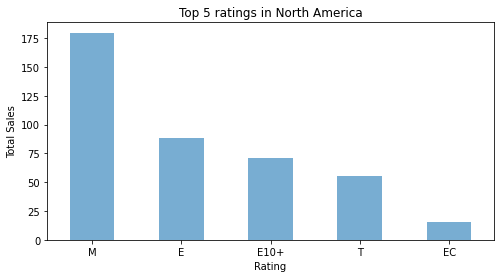

In [74]:
na_rating.plot.bar(x = 'rating', y = 'na_sales', rot = 0, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title("Top 5 ratings in North America");

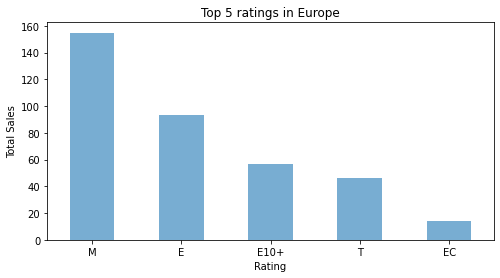

In [75]:
eu_rating.plot.bar(x = 'rating', y = 'eu_sales', rot = 0, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title("Top 5 ratings in Europe");

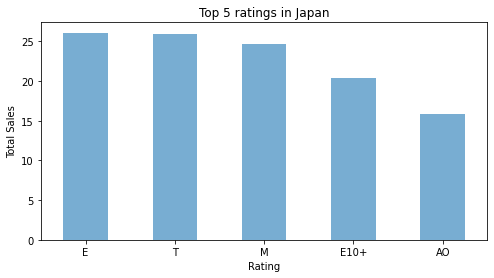

In [76]:
jp_rating.plot.bar(x = 'rating', y = 'jp_sales', rot = 0, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title("Top 5 ratings in Japan");

**Conclusion**

We discovered that ESRB rating does affect sales in individual regions. In each of the three regions, rating `E`, `T`, `M`, and `E10+` got the highest sales.

## Test the hypotheses

### Test 1

**Average user ratings of the Xbox One and PC platforms are the same.**

In [80]:
# calculate the average user rating of Xbox One and PC platforms
df_Xone = df_new[df_new.platform.isin(['XOne'])]
df_pc = df_new[df_new.platform.isin(['PC'])]
print('The average user rating of Xbox One is', round(df_Xone['user_score'].mean(), 2))
print('The average user rating of PC is', round(df_pc['user_score'].mean(), 2))

The average user rating of Xbox One is 5.93
The average user rating of PC is 5.87


We know the average user rating for `XOne` and `PC` are different. We want to test whether the difference is significant. The null hypothesis is there is no average user rating difference between `XOne` and `PC` platforms, the alternative hypothesis is the average user rating of `XOne` and `PC` platforms differs. We use significant level 0.05.

* $H_0$: there is no average user rating difference between `XOne` and `PC` platforms.
* $H_1$: the average user rating of `XOne` and `PC` platforms differs.
* $\alpha$ = 0.05
* If the p-value < $\alpha$, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis.

In [ ]:
XOne = df_Xone['user_score']
PC = df_pc['user_score']

alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis')

**Conclusion**

Based on our testing, we reject the null hypothesis. That is, there is no average user rating difference between `XOne` and `PC` platforms.

### Test 2

**Average user ratings for the Action and Sports genres are different**

In [81]:
# calculate the average user rating of Action and Sports genres
df_action = df_new[df_new.genre.isin(['Action'])]
df_sports = df_new[df_new.genre.isin(['Sports'])]
print('The average user rating of Action genre is', round(df_action['user_score'].mean(), 2))
print('The average user rating of Sports genre is', round(df_sports['user_score'].mean(), 2))

The average user rating of Action genre is 5.73
The average user rating of Sports genre is 5.06


We know the average user rating for `Action` and `Sports` are different. We want to test whether the difference is significant. The null hypothesis is there is no average user rating difference between `Action` and `Sports`, the alternative hypothesis is the average user rating of `Action` and `Sports` genres differs. We use significant level 0.05.

* $H_0$: there is no average user rating difference between `Action` and `Sports` genres.
* $H_1$: the average user rating of `Action` and `Sports` genres differs. 
* $\alpha$ = 0.05
* If the p-value < $\alpha$, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis.

In [ ]:
Action = df_action['user_score']
Sports = df_sports['user_score']

alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis')

**Conclusion**

Based on our testing, we reject the null hypothesis. That is, the average user rating of `Action` and `Sports` genres differs.

## Overall Conclusion

**By looking at the general information of the data**
* We identified there were missing values in `name`, `genre`, `year_of_release`, `critic_score`, `rating`, and `user_score`. 
* Then, we dropped missing values from `name` and `genre`, we replaced missing values from `year_of_release`, `critic_score`, `rating` and `user_score` by randomly choosing from non missing values.
* We converted columns' datatypes to the correct ones. We calculated `total_sales` by adding up sales from different regions. 

**By analyzing the data**
* We noticed after year 1994, the number of games released each year starts increasing. The peak number is in year 2009. Starting from 2009, the number of games released each year starts decreasing. This is because the use of smart phones, people started to play games on their smart phones and tablets. 
* We observed that the top 5 platforms with greatest sales are `PS2`, `DS`, `PS3`, `Wii`, and `X360`. 
* `PS2`, `X360`, `PS3`, `Wii`, `DS`, and `PS` are platforms used to be popular. In these popular platforms, `PS2`, `DS`, and `PS` have zero sales in year 2016. 
* By plotting a heatmap, we found that  `PS4`, `PS3`, `XOne`, `3DS`, and `X360` are platforms that are leading in sales, platforms such as `3DS`, `2600`, and `GBA` are platforms are shrinking in sales. 
* Platforms that are potentially profitable are `PS4` and `XOne`. We found `PS4` has the highest mean value in terms of total sales and `PS4` also has the highest average sales across the various platforms. We found that professional reviews doesn't correlate with total sales for popular platforms. 
* For `Action`, `Shooter`, `Sports`, `Role-Playing`, and `Misc` have the greatest sales, and `Puzzle` has the least sales.
* After plotting scatterplots, we found that no significant relation between professional scores and total sales for top sales platforms.

**At creating a user profile for each region**

After analyzing top 5 platforms, genres, and ESRB ratings in terms of total sales in different regions. 
* We found that the top 5 platforms in North America and Europe are pretty similar. However, in Japan, the top 1 platform is `3DS`, followed by `DS`. We can see `3DS` is in rank 5 in the top 5 lists in North America and Europe. 
* The top 5 genres in North America and Europe are the same, in Japan, however, is different. The top 1 genre in Japan is `Role-Playing`, which doesn't appear in the list for both North America and Europe. 
* We discovered that ESRB rating does affect sales in individual regions. In each of the three regions, rating `E`, `T`, `M`, `E10+`, and `AO` got the highest sales.

**At testing hypotheses stage**
* We used null hypothesis testing tested whether average user ratings of the Xbox One and PC platforms are the same, and we concluded there is no average user rating difference between `XOne` and `PC` platforms. 
* We also tested whether average user ratings for the Action and Sports genres are different, and we concluded the average user rating of Action and Sports genres differs.

In [82]:
from platform import python_version

print(python_version())

3.8.3
